### Task One: Data preparation and customer analytics.
#### Conduct analysis on your client's transaction dataset and identify customer purchasing behaviours to generate insights and provide commercial recommendations.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [34]:
transaction_data = pd.read_csv("QVI_transaction_data.csv")
customer_data = pd.read_csv("QVI_purchase_behaviour.csv")

In [35]:
print(transaction_data.info())
print(transaction_data.head(5))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
None
    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                   

In [36]:
print(transaction_data['DATE'].dtype)
transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'], origin='1899-12-30', unit='D')

int64


In [37]:
print(transaction_data['PROD_NAME'].value_counts())

PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: count, Length: 114, dtype: int64


In [38]:
product_words = transaction_data['PROD_NAME'].str.split(expand=True).stack()
product_words = product_words[~product_words.str.contains(r'\d|&')]
product_words = product_words.value_counts()

print(product_words)

Chips        49770
Kettle       41288
Smiths       28860
Salt         27976
Cheese       27890
             ...  
Frch/Onin     1432
Pc            1431
NCC           1419
Garden        1419
Fries         1418
Name: count, Length: 171, dtype: int64


In [39]:
transaction_data = transaction_data[~transaction_data['PROD_NAME'].str.contains("salsa", case=False)]


In [40]:
summary = transaction_data.describe(include='all')
print(summary)

                                 DATE      STORE_NBR  LYLTY_CARD_NBR  \
count                          246742  246742.000000    2.467420e+05   
unique                            NaN            NaN             NaN   
top                               NaN            NaN             NaN   
freq                              NaN            NaN             NaN   
mean    2018-12-30 01:19:01.211467520     135.051098    1.355310e+05   
min               2018-07-01 00:00:00       1.000000    1.000000e+03   
25%               2018-09-30 00:00:00      70.000000    7.001500e+04   
50%               2018-12-30 00:00:00     130.000000    1.303670e+05   
75%               2019-03-31 00:00:00     203.000000    2.030840e+05   
max               2019-06-30 00:00:00     272.000000    2.373711e+06   
std                               NaN      76.787096    8.071528e+04   

              TXN_ID       PROD_NBR                               PROD_NAME  \
count   2.467420e+05  246742.000000                     

In [41]:
outliers = transaction_data[transaction_data['PROD_QTY'] == 200]
print(outliers)

            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


In [42]:
customer_id = outliers['LYLTY_CARD_NBR'].unique()[0]
other_transactions = transaction_data[transaction_data['LYLTY_CARD_NBR'] == customer_id]
print(other_transactions)

            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


In [43]:
transaction_data = transaction_data[transaction_data['LYLTY_CARD_NBR'] != customer_id]
print(transaction_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 246740 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246740 non-null  datetime64[ns]
 1   STORE_NBR       246740 non-null  int64         
 2   LYLTY_CARD_NBR  246740 non-null  int64         
 3   TXN_ID          246740 non-null  int64         
 4   PROD_NBR        246740 non-null  int64         
 5   PROD_NAME       246740 non-null  object        
 6   PROD_QTY        246740 non-null  int64         
 7   TOT_SALES       246740 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.9+ MB
None


In [44]:
transaction_counts = transaction_data['DATE'].value_counts().sort_index()
print(transaction_counts)


DATE
2018-07-01    663
2018-07-02    650
2018-07-03    674
2018-07-04    669
2018-07-05    660
             ... 
2019-06-26    657
2019-06-27    669
2019-06-28    673
2019-06-29    703
2019-06-30    704
Name: count, Length: 364, dtype: int64


In [45]:
date_range = pd.date_range(start='2018-07-01', end='2019-06-30')
transactions_by_day = transaction_data.groupby('DATE').size().reindex(date_range, fill_value=0).reset_index(name='N')
transactions_by_day.columns = ['DATE', 'N']
print(transactions_by_day)


          DATE    N
0   2018-07-01  663
1   2018-07-02  650
2   2018-07-03  674
3   2018-07-04  669
4   2018-07-05  660
..         ...  ...
360 2019-06-26  657
361 2019-06-27  669
362 2019-06-28  673
363 2019-06-29  703
364 2019-06-30  704

[365 rows x 2 columns]


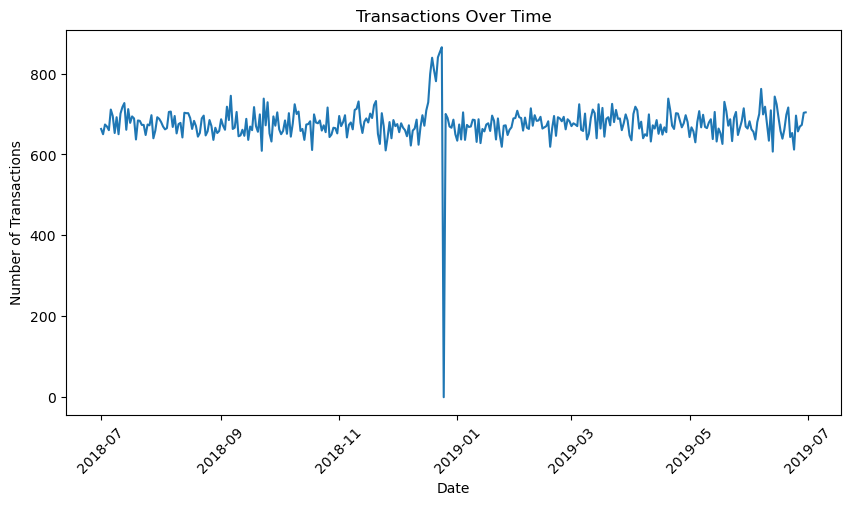

In [46]:
plt.figure(figsize=(10, 5))
plt.plot(transactions_by_day['DATE'], transactions_by_day['N'])
plt.title('Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()


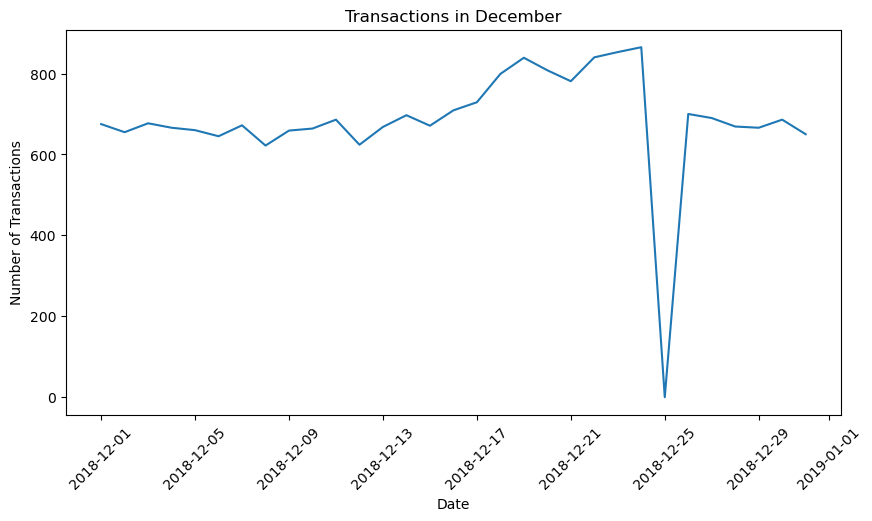

In [47]:
december_data = transactions_by_day[transactions_by_day['DATE'].dt.month == 12]
plt.figure(figsize=(10, 5))
plt.plot(december_data['DATE'], december_data['N'])
plt.title('Transactions in December')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()


In [48]:
transaction_data['PACK_SIZE'] = transaction_data['PROD_NAME'].str.extract('(\d+)').astype(int)
print(transaction_data['PACK_SIZE'].value_counts().sort_index())


PACK_SIZE
70      1507
90      3008
110    22387
125     1454
134    25102
135     3257
150    40203
160     2970
165    15297
170    19983
175    66390
180     1468
190     2995
200     4473
210     6272
220     1564
250     3169
270     6285
330    12540
380     6416
Name: count, dtype: int64


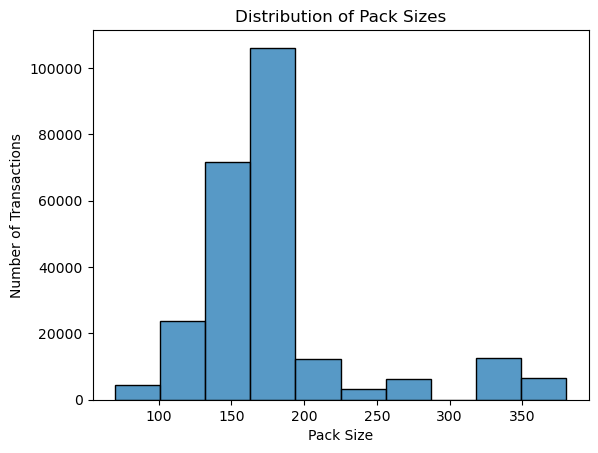

In [49]:
sns.histplot(transaction_data['PACK_SIZE'], bins=10)
plt.title('Distribution of Pack Sizes')
plt.xlabel('Pack Size')
plt.ylabel('Number of Transactions')
plt.show()


In [50]:
transaction_data['BRAND'] = transaction_data['PROD_NAME'].str.split().str[0]
print(transaction_data['BRAND'].value_counts())


BRAND
Kettle        41288
Smiths        27390
Pringles      25102
Doritos       22041
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Red            4427
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: count, dtype: int64


In [51]:
transaction_data.loc[transaction_data['BRAND'] == 'Red', 'BRAND'] = 'RRD'
transaction_data.loc[transaction_data['BRAND'] == 'Smith', 'BRAND'] = 'Smiths'
transaction_data.loc[transaction_data['BRAND'] == 'Dorito', 'BRAND'] = 'Doritos'
transaction_data.loc[transaction_data['BRAND'] == 'Infzns', 'BRAND'] = 'Infuzions'
transaction_data.loc[transaction_data['BRAND'] == 'Snbts', 'BRAND'] = 'Sunbites'
print(transaction_data['BRAND'].value_counts())

BRAND
Kettle        41288
Smiths        30353
Doritos       25224
Pringles      25102
RRD           16321
Infuzions     14201
Thins         14075
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Sunbites       3008
Cheetos        2927
Burger         1564
Woolworths     1516
GrnWves        1468
NCC            1419
French         1418
Name: count, dtype: int64


In [52]:
print(customer_data.describe(include='all'))
print(customer_data['LIFESTAGE'].value_counts())


        LYLTY_CARD_NBR LIFESTAGE PREMIUM_CUSTOMER
count     7.263700e+04     72637            72637
unique             NaN         7                3
top                NaN  RETIREES       Mainstream
freq               NaN     14805            29245
mean      1.361859e+05       NaN              NaN
std       8.989293e+04       NaN              NaN
min       1.000000e+03       NaN              NaN
25%       6.620200e+04       NaN              NaN
50%       1.340400e+05       NaN              NaN
75%       2.033750e+05       NaN              NaN
max       2.373711e+06       NaN              NaN
LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64


In [53]:
joined_customer_data = pd.merge(transaction_data, customer_data, on='LYLTY_CARD_NBR', how='left')
print(joined_customer_data.head(5))


        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  \
0    Natural Chip        Compny SeaSalt175g         2        6.0        175   
1                  CCs Nacho Cheese    175g         3        6.3        175   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9        170   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0        175   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8        150   

     BRAND               LIFESTAGE PREMIUM_CUSTOMER  
0  Natural   YOUNG SINGLES/COUPLES          Premium  
1      CCs  MIDAGE SINGLES/COUPLES           Budge

In [54]:
missing_customers = joined_customer_data[joined_customer_data['LYLTY_CARD_NBR'].isnull()]
print(missing_customers)

Empty DataFrame
Columns: [DATE, STORE_NBR, LYLTY_CARD_NBR, TXN_ID, PROD_NBR, PROD_NAME, PROD_QTY, TOT_SALES, PACK_SIZE, BRAND, LIFESTAGE, PREMIUM_CUSTOMER]
Index: []


In [55]:
joined_customer_data.to_csv("QVI_data.csv", index=False)
print(joined_customer_data.head(5))

        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  \
0    Natural Chip        Compny SeaSalt175g         2        6.0        175   
1                  CCs Nacho Cheese    175g         3        6.3        175   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9        170   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0        175   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8        150   

     BRAND               LIFESTAGE PREMIUM_CUSTOMER  
0  Natural   YOUNG SINGLES/COUPLES          Premium  
1      CCs  MIDAGE SINGLES/COUPLES           Budge

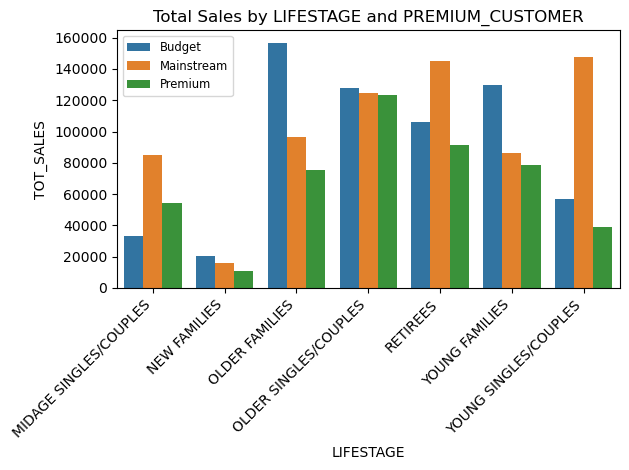

In [56]:
sales_summary = joined_customer_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
sns.barplot(x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER', data=sales_summary)
plt.title('Total Sales by LIFESTAGE and PREMIUM_CUSTOMER')
plt.legend(fontsize='small', loc='best')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

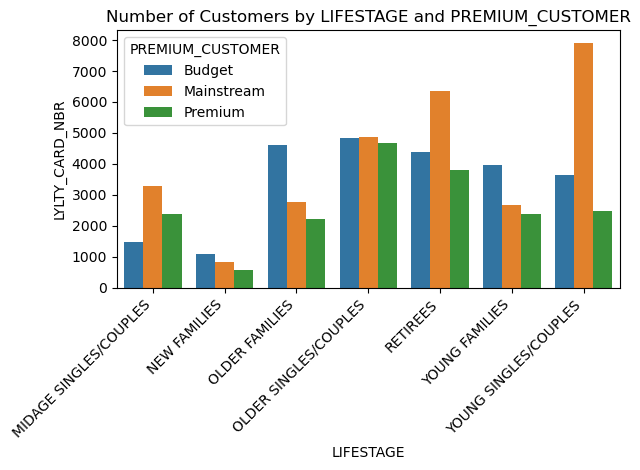

In [57]:
customer_counts = joined_customer_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()
sns.barplot(x='LIFESTAGE', y='LYLTY_CARD_NBR', hue='PREMIUM_CUSTOMER', data=customer_counts)
plt.title('Number of Customers by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

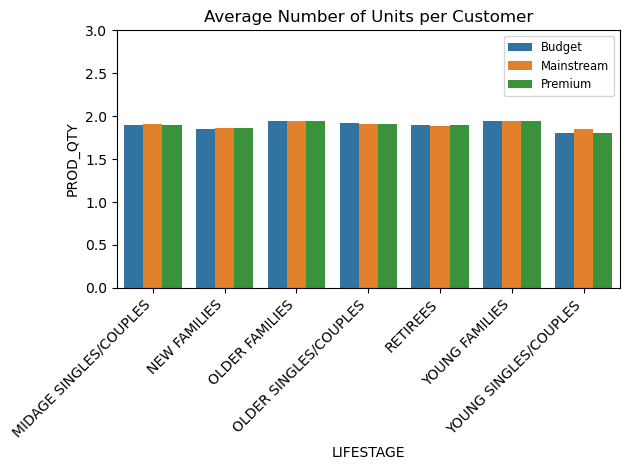

In [58]:
average_units = joined_customer_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean().reset_index()
sns.barplot(x='LIFESTAGE', y='PROD_QTY', hue='PREMIUM_CUSTOMER', data=average_units)
plt.title('Average Number of Units per Customer')
plt.legend(fontsize='small', loc='best')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.ylim(0, 3.00)
plt.show()

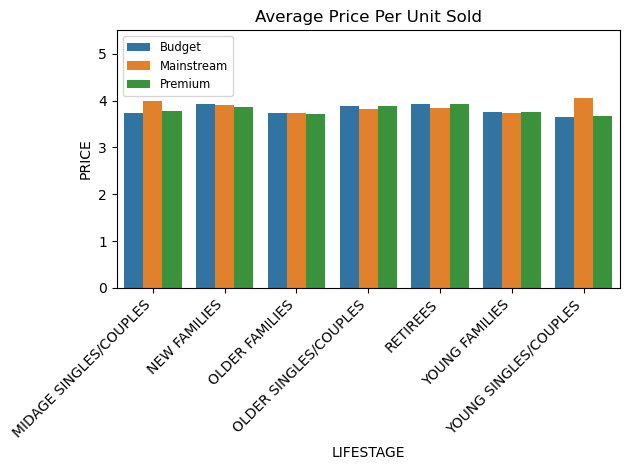

In [59]:
joined_customer_data['PRICE'] = joined_customer_data['TOT_SALES'] / joined_customer_data['PROD_QTY']
average_price = joined_customer_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PRICE'].mean().reset_index()
sns.barplot(x='LIFESTAGE', y='PRICE', hue='PREMIUM_CUSTOMER', data=average_price)
plt.title('Average Price Per Unit Sold')
plt.legend(fontsize='small', loc='upper left')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.ylim(0, 5.5)
plt.show()


In [60]:
mainstream_prices = joined_customer_data[joined_customer_data['PREMIUM_CUSTOMER'] == 'Mainstream']['PRICE']
premium_prices = joined_customer_data[joined_customer_data['PREMIUM_CUSTOMER'] == 'Premium']['PRICE']

t_stat, p_value = stats.ttest_ind(mainstream_prices, premium_prices)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: 11.096115580393358, P-value: 1.3420572458727282e-28


In [61]:
preferred_brands = joined_customer_data[joined_customer_data['LIFESTAGE'] == 'Mainstream - young singles/couples']['BRAND'].value_counts()
print(preferred_brands)

Series([], Name: count, dtype: int64)


In [62]:
print(joined_customer_data.head(5))

        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  \
0    Natural Chip        Compny SeaSalt175g         2        6.0        175   
1                  CCs Nacho Cheese    175g         3        6.3        175   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9        170   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0        175   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8        150   

     BRAND               LIFESTAGE PREMIUM_CUSTOMER  PRICE  
0  Natural   YOUNG SINGLES/COUPLES          Premium   3.00  
1      CCs  MIDAGE SINGLES/COUPLES  

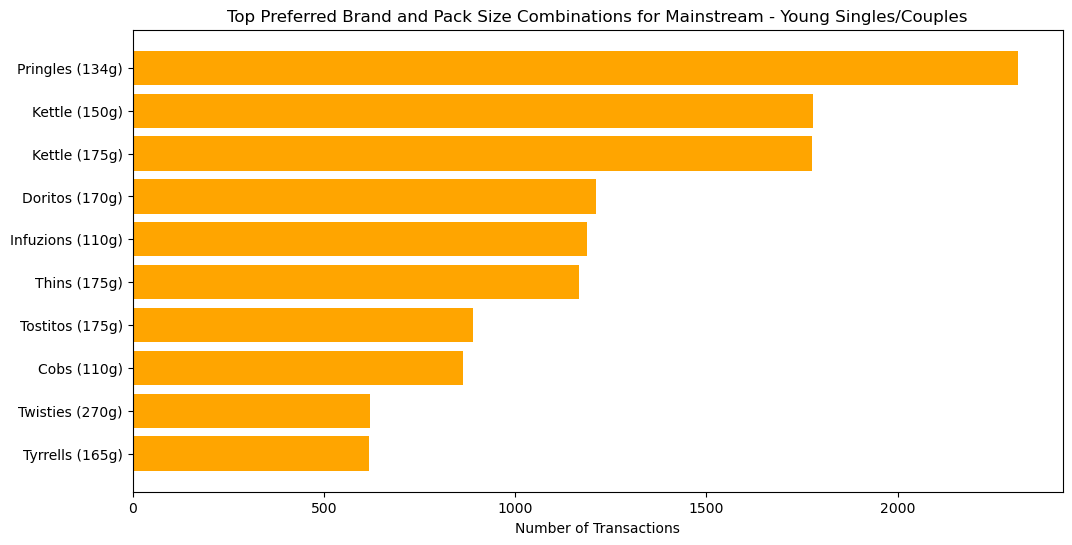

In [63]:
young_mainstream = joined_customer_data[(joined_customer_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (joined_customer_data['PREMIUM_CUSTOMER'] == 'Mainstream')]
preferred_combinations = young_mainstream.groupby(['BRAND', 'PACK_SIZE']).size().reset_index(name='COUNT')
sorted_combinations =  preferred_combinations.sort_values(by='COUNT', ascending=False)
plt.figure(figsize=(12, 6))
top_brands = sorted_combinations.head(10)
plt.barh(top_brands['BRAND'] + ' (' + top_brands['PACK_SIZE'].astype(str) + 'g)', top_brands['COUNT'], color='orange')
plt.xlabel('Number of Transactions')
plt.title('Top Preferred Brand and Pack Size Combinations for Mainstream - Young Singles/Couples')
plt.gca().invert_yaxis()
plt.show()

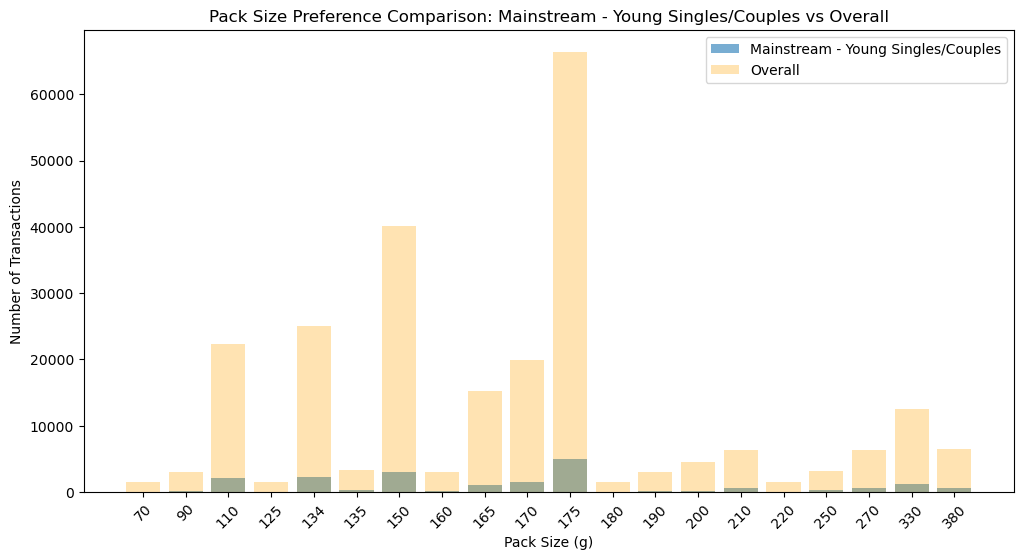

In [64]:
pack_size_counts = young_mainstream['PACK_SIZE'].value_counts().reset_index()
pack_size_counts.columns = ['PACK_SIZE', 'COUNT']

overall_pack_size_counts = joined_customer_data['PACK_SIZE'].value_counts().reset_index()
overall_pack_size_counts.columns = ['PACK_SIZE', 'OVERALL_COUNT']

comparison_df = pd.merge(pack_size_counts, overall_pack_size_counts, on='PACK_SIZE', how='outer')

comparison_df.fillna(0, inplace=True)

plt.figure(figsize=(12, 6))
plt.bar(comparison_df['PACK_SIZE'].astype(str), comparison_df['COUNT'], alpha=0.6, label='Mainstream - Young Singles/Couples')
plt.bar(comparison_df['PACK_SIZE'].astype(str), comparison_df['OVERALL_COUNT'], alpha=0.3, label='Overall', color='orange')

plt.xlabel('Pack Size (g)')
plt.ylabel('Number of Transactions')
plt.title('Pack Size Preference Comparison: Mainstream - Young Singles/Couples vs Overall')
plt.legend()
plt.xticks(rotation=45)
plt.show()